In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset 
from Covonutional_neural_network.modelUttils.augment_dataset import add_label_noise

In [2]:
folder_paths = [
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\(',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\)',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\0',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\1',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\2',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\3',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\4',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\5',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\6',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\7',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\8',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\9',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\add','C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\dec','C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\div',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\eq',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\mul',"C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\sub",
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\y',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\z',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\+',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\÷',
]

In [3]:
X, y = load_dataset(folder_path=folder_paths)

Loading Dataset .............
Skipping image C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\symbols\(\(-192.jpg: No edges detected.
Skipping image C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\symbols\)\)-488.jpg: No edges detected.
Error loading image C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\1\1-1.jpg: UnboundLocalError - cannot access local variable 'char_image' where it is not associated with a value
Error loading image C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\div\div-1.png: UnboundLocalError - cannot access local variable 'char_image' where it is not associated with a value
Error loading image C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\eq\eq-1.jpg: UnboundLocalError - cannot access local variable 'char_image' where it is not associated with a value
Error loading image C:\Users\visha\OneDrive\Desktop\entiredataset\dataset\eq\eq-10.jpg: UnboundLocalError - cannot access local variable 'char_image' where it is not associated with a v

In [4]:
X.shape

torch.Size([88852, 1, 28, 28])

In [5]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [6]:
X = X.reshape(-1, 28*28)

c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


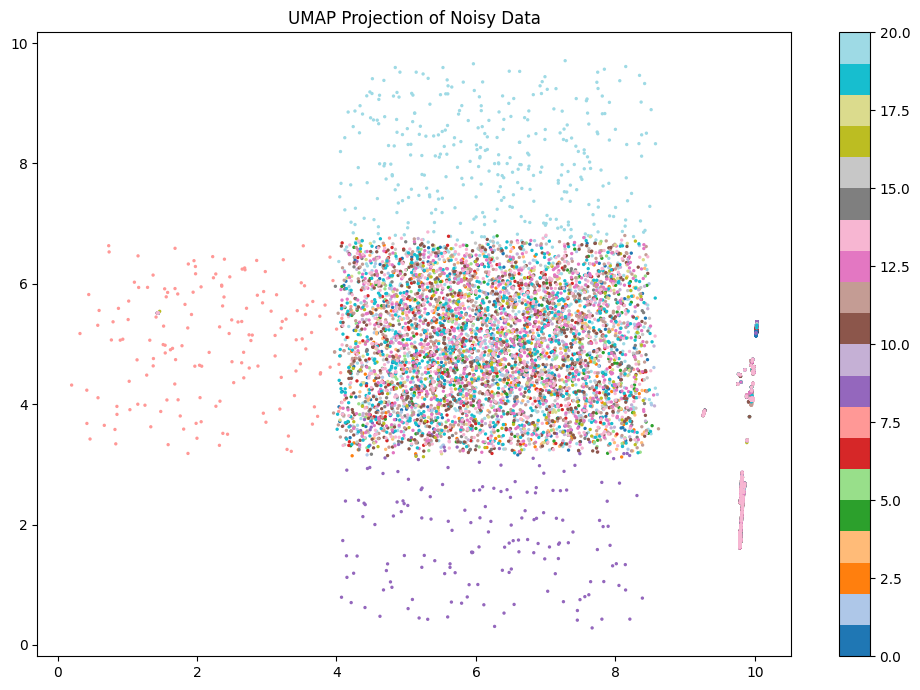

In [7]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=28*28)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab20', s=2)
plt.title("UMAP Projection of Noisy Data")
plt.colorbar()
plt.tight_layout()
plt.show()


In [8]:
# Define a bounding box for the central region (adjust as needed)
x_min, x_max = 4, 10  # X-axis range for the central cluster
y_min, y_max = 2, 6   # Y-axis range for the central cluster

# Filter points in the central region
central_region = (X_umap[:, 0] >= x_min) & (X_umap[:, 0] <= x_max) & \
                 (X_umap[:, 1] >= y_min) & (X_umap[:, 1] <= y_max)

# Get the unique classes in the central region
overlapping_classes = np.unique(y[central_region])

print(f"Classes in the overlapping region: {overlapping_classes}")
print(f"Number of overlapping classes: {len(overlapping_classes)}")

Classes in the overlapping region: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Number of overlapping classes: 21


In [9]:
X -= X.mean(axis=0)
cov = X.T@X / X.shape[0]

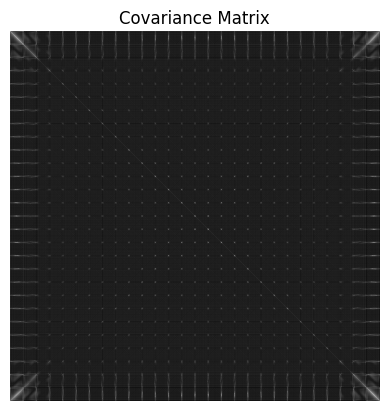

In [10]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [12]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95013618, 0.95130907, 0.95247869, 0.95364506, 0.95480817,
       0.95596802, 0.95712461, 0.95822582, 0.95932377, 0.96042823,
       0.96152292, 0.9626111 , 0.96369601, 0.96478745, 0.96586911,
       0.96694099, 0.96801613, 0.96909453, 0.97016316, 0.97116337,
       0.97217661, 0.97318659, 0.97419006, 0.97519678, 0.97619373,
       0.97718743, 0.97817786, 0.97916178, 0.98014896, 0.98112962,
       0.98210702, 0.98299971, 0.98389892, 0.98480139, 0.98569734,
       0.98658678, 0.98747296, 0.98835588, 0.98923554, 0.99011195,
       0.99098509, 0.99185498, 0.99272161, 0.99358498, 0.9944451 ,
       0.99530195, 0.99598288, 0.99666054, 0.99733495, 0.9980061 ,
       0.99867399, 0.99933862, 1.        ])

In [13]:
W = eigenvectors[:, :len(eigenvectors) - len(rule)]
# W = eigenvectors
W.shape

torch.Size([784, 731])

In [14]:
new_X = W.T @ X.T 

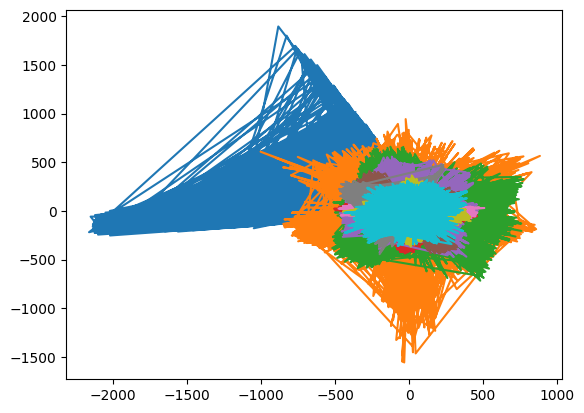

In [15]:
plt.plot(new_X[0], new_X[1], new_X[2], new_X[3], new_X[4], new_X[5], new_X[6], new_X[7], new_X[8], new_X[9], new_X[10], new_X[11], new_X[12], new_X[13], new_X[14], new_X[15], new_X[16], new_X[17], new_X[18], new_X[19])


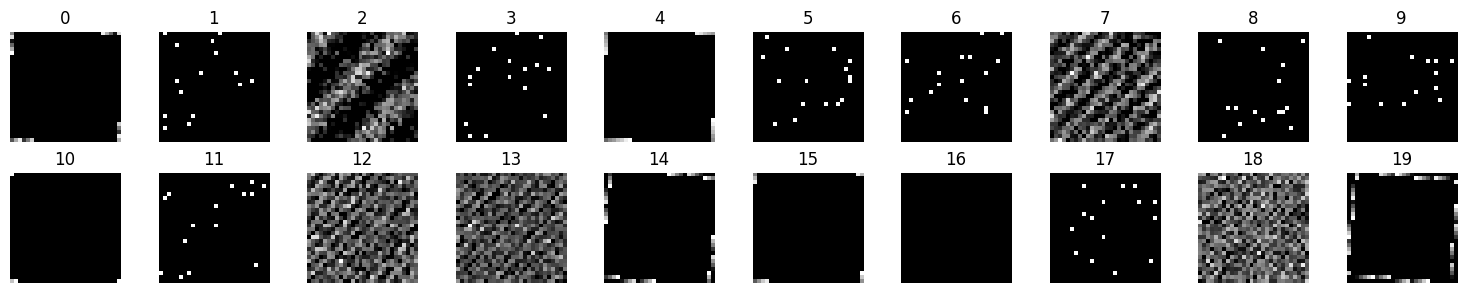

In [16]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = add_label_noise(np.zeros((28, 28)), label)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()
